In [2]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [3]:
# open file and read in lines
with open('AO_August_7_1960.txt', 'r') as file_in:
    raw_text = file_in.readlines()
aug_7_1960 = ''.join(raw_text)


with open('AO_August_14_1960.txt', 'r') as file_in:
    raw_text = file_in.readlines()
aug_14_1960 = ''.join(raw_text)

In [63]:
nlp_lg = spacy.load('en_core_web_lg')

In [58]:
# nlp_sm = spacy.load('en')

In [64]:
doc_aug7 = nlp_lg(aug_7_1960)
doc_aug14 = nlp_lg(aug_14_1960)

In [68]:
doc_aug_7 = [word for word in doc_aug7 
             if word.is_stop == False 
             and word.is_punct == False 
             and word.is_space == False and word.is_digit == False and word.like_num == False]

In [69]:
doc_aug_14 = [word for word in doc_aug14 if word.is_stop == False and word.is_punct == False and word.is_space == False and word.is_digit == False and word.like_num == False]

In [35]:
[print(word) for word in doc_aug14 if word.text == 'kennedy']

[]

In [26]:
wordVecs_aug_7 = []
for word in doc_aug_7:
    if word.text.lower() == 'american':
        for word2 in doc_aug_7:
            if 0.6> word.similarity(word2) > 0.3:
                print(word.similarity(word2), word2.text, word2.vector_norm)
                wordVecs_aug_7.append(word2)

0.5561458 ARAB 7.1203003
0.45548943 August 5.8729153
0.5561458 ARAB 7.1203003
0.39299136 WORLD 5.9745507
0.44883958 Lebanon 6.6515126
0.5561457 Arab 7.1203003
0.3795601 Algeria 6.8874273
0.39913616 War 6.890236
0.5561457 Arab 7.1203003
0.5561458 ARAB 7.1203003
0.46157506 History 5.927518
0.3840669 Women 7.2206335
0.46745545 National 6.4168935
0.31643277 Law 7.036874
0.3296396 Zionist 7.3919716
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.46745545 National 6.4168935
0.30331504 Cairo 6.836638
0.44033408 Country 6.06488
0.32519788 Old 5.89691
0.39583355 Belgian 6.3402867
0.3032794 Government 6.9297547
0.31570467 Imperialism 7.257934
0.35489523 Congo 6.571269
0.5372427 ISRAEL 7.144439
0.5372427 Israel 7.144439
0.35489523 Congo 6.571269
0.37825966 Portugal 7.291342
0.44883958 LEBANON 6.6515126
0.5561458 ARAB 7.1203003
0.31414714 RADIO 7.246786
0.35489523 Congo 6.571269
0.5561457 Arab 7.1203003
0.46745545 National 6.4168935
0.42659935 pany 5.7959237
0.33100644 Middle 5.492601
0.344

0.39913616 war 6.890236
0.3795601 Algeria 6.8874273
0.39913616 war 6.890236
0.38067392 how 5.2509694
0.30782053 go 5.05723
0.31298906 they 5.409625
0.5561458 ARAB 7.1203003
0.5561458 ARAB 7.1203003
0.39299136 WORLD 5.9745507
0.5561457 Arab 7.1203003
0.3603416 education 6.778047
0.33399844 science 6.939878
0.369728 culture 6.839358
0.33117765 common 5.6285415
0.38067392 how 5.2509694
0.5561457 Arab 7.1203003
0.3929913 world 5.9745507
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.5561458 ARAB 7.1203003
0.36839667 NON 6.3645062
0.3179686 general 5.413368
0.5561457 Arab 7.1203003
0.3179686 general 5.413368
0.33399844 science 6.939878
0.5561457 Arab 7.1203003
0.39299136 World 5.9745507
0.5561457 Arab 7.1203003
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.35242447 sports 6.7592382
0.5561457 Arab 7.1203003
0.31582448 youth 6.5703225
0.41025743 Arabs 7.500925
0.39299136 World 5.9745507
0.3603416 education 6.778047
0.5561457 Arab 7.1203003
0.44883958 Lebanon 6.6515126
0.3

0.45548943 AUGUST 5.8729153
0.31643277 Law 7.036874
0.32519788 OLD 5.89691
0.30389908 not 4.9436083
0.31298906 they 5.409625
0.33616984 people 5.853792
0.32519788 old 5.89691
0.32519788 old 5.89691
0.3417464 customs 6.9229627
0.32643917 care 6.3912077
0.31226137 better 5.1071477
0.32643917 care 6.3912077
0.32519788 old 5.89691
0.31643277 law 7.036874
0.31643277 law 7.036874
0.31643277 law 7.036874
0.31469986 life 5.989881
0.31298906 They 5.409625
0.47698724 July 6.1310706
0.40360597 September 6.2501817
0.3613953 Dr. 6.1401415
0.41949636 Society 6.60828
0.43203548 Dr 6.625482
0.31469986 life 5.989881
0.55678606 Christian 7.04057
0.3419131 nations 7.1281624
0.31643277 law 7.036874
0.31643277 Law 7.036874
0.31643277 law 7.036874
0.46745545 National 6.4168935
0.31643277 law 7.036874
0.30573237 countries 7.216479
0.33839348 Northern 6.8115573
0.47633338 Egypt 7.134614
0.33616984 people 5.853792
0.41232118 West 6.6147976
0.3030518 think 5.335493
0.33616984 people 5.853792
0.38067392 how 5.25

0.3795601 Algeria 6.8874273
0.5224939 France 7.1106524
0.34257695 Algerian 6.94459
0.33616984 people 5.853792
0.57184196 Britain 6.491983
0.30389908 not 4.9436083
0.30389908 not 4.9436083
0.36831877 Cyprus 6.804315
0.57184196 Britain 6.491983
0.41078687 Kenya 6.883608
0.430382 Nigeria 6.989754
0.5753957 United 5.9802823
0.33884373 States 5.760805
0.33802548 NATO 7.1429086
0.40502605 military 7.1649227
0.31570467 Imperialism 7.257934
0.33884373 states 5.760805
0.31298906 they 5.409625
0.30389908 not 4.9436083
0.39137638 peoples 6.6872835
0.45548943 AUGUST 5.8729153
0.5372427 ISRAEL 7.144439
0.34042543 What 5.135811
0.31298906 they 5.409625
0.5372427 Israel 7.144439
0.32668114 lion 6.5120897
0.5561457 Arab 7.1203003
0.33616984 people 5.853792
0.30573237 countries 7.216479
0.5372427 Israel 7.144439
0.50380754 TV 7.157099
0.44033408 country 6.06488
0.31298906 they 5.409625
0.33149827 U.S.A 6.268666
0.42550433 nation 6.5287275
0.5753957 United 5.9802823
0.34191313 Nations 7.1281624
0.384066

0.31570467 Imperialism 7.257934
0.31570467 Imperialism 7.257934
0.34042543 what 5.135811
0.59040576 Africa 6.7487316
0.30573237 countries 7.216479
0.31251305 Independence 6.7479477
0.59040576 Africa 6.7487316
0.46745545 National 6.4168935
0.36014202 Union 6.693675
0.39583355 Belgian 6.3402867
0.37622765 Afro 6.846816
0.5569777 Asian 7.5145483
0.33839348 Northern 6.8115573
0.30331504 Cairo 6.836638
0.35489523 Congo 6.571269
0.46745545 National 6.4168935
0.36014202 Union 6.693675
0.33616984 people 5.853792
0.39583355 Belgian 6.3402867
0.31570467 Imperialism 7.257934
0.36014202 Union 6.693675
0.40739316 Africans 7.2093425
0.32257777 dawn 6.0465317
0.33638257 freedom 6.397297
0.41025743 Arabs 7.500925
0.5561458 ARAB 7.1203003
0.38148868 Association 5.919654
0.46745545 National 6.4168935
0.30331504 Cairo 6.836638
0.37622765 Afro 6.846816
0.5569777 Asian 7.5145483
0.3282216 citizens 6.5995517
0.5753957 United 5.9802823
0.30331504 Cairo 6.836638
0.46745545 National 6.4168935
0.36014202 Union 

0.30429178 get 5.107025
0.30331504 Cairo 6.836638
0.45397505 Soviet 6.394883
0.41755667 Moscow 6.4033403
0.30389908 not 4.9436083
0.30331504 Cairo 6.836638
0.5561458 ARAB 7.1203003
0.33839348 Northern 6.8115573
0.48333102 Austrian 6.257258
0.31863347 commercial 6.148641
0.45548943 August 5.8729153
0.30241227 dollars 6.7409954
0.4933038 Egyptian 7.1018686
0.3733866 Southern 6.7571673
0.31298906 They 5.409625
0.33839348 Northern 6.8115573
0.30643868 news 6.082174
0.33839348 Northern 6.8115573
0.42349198 International 6.529111
0.42659935 pany 5.7959237
0.30241227 dollars 6.7409954
0.33839348 Northern 6.8115573
0.47698724 July 6.1310706
0.30190787 Business 6.409597
0.5753957 United 5.9802823
0.5561457 Arab 7.1203003
0.45323843 Republic 6.601141
0.30643868 news 6.082174
0.31863347 commercial 6.148641
0.3733866 Southern 6.7571673
0.30241227 dollars 6.7409954
0.33839348 Northern 6.8115573
0.5753957 United 5.9802823
0.33884373 States 5.760805
0.39724755 Institute 6.1632695
0.30331504 Cairo 6.8

0.31570467 Imperialism 7.257934
0.35489523 Congo 6.571269
0.5372427 ISRAEL 7.144439
0.5372427 Israel 7.144439
0.35489523 Congo 6.571269
0.37825966 Portugal 7.291342
0.44883958 LEBANON 6.6515126
0.5561458 ARAB 7.1203003
0.31414714 RADIO 7.246786
0.35489523 Congo 6.571269
0.5561457 Arab 7.1203003
0.46745545 National 6.4168935
0.42659935 pany 5.7959237
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.42349198 International 6.529111
0.47403553 Portland 6.355111
0.47403553 Portland 6.355111
0.47403553 Portland 6.355111
0.47403553 Portland 6.355111
0.47403553 Portland 6.355111
0.47403553 Portland 6.355111
0.5561457 Arab 7.1203003
0.30118343 ali 7.0754066
0.5854169 Boston 6.7661023
0.5690452 Germany 7.046142
0.46745545 national 6.4168935
0.49561256 London 7.233202
0.31636328 kind 5.117342
0.47403553 Portland 6.355111
0.30888933 Avenue 6.447627
0.47698724 July 6.1310706
0.30331504 Cairo 6.836638
0.46745545 NATIONAL 6.4168935
0.31107146 A. 4.606108
0.31107146 A. 4.606108
0.3529308 St 6.75

0.45548943 AUGUST 5.8729153
0.46157512 HISTORY 5.927518
0.3840669 Women 7.2206335
0.46745545 National 6.4168935
0.46745545 National 6.4168935
0.39239934 November 6.286818
0.46745545 National 6.4168935
0.49561256 London 7.233202
0.38184 medical 6.911113
0.33099997 men 7.015465
0.32809606 backgrounds 6.718213
0.379401 housewives 7.223363
0.46157506 history 5.927518
0.3840669 Women 7.2206335
0.34526727 civil 6.7736616
0.32643917 care 6.3912077
0.30389908 not 4.9436083
0.3603416 education 6.778047
0.46157506 history 5.927518
0.33470425 grand 6.2593036
0.5561457 Arab 7.1203003
0.3729167 FOREIGN 6.6654596
0.3434654 picture 5.847505
0.34056965 young 6.5996394
0.33839348 Northern 6.8115573
0.31643277 Law 7.036874
0.5561457 Arab 7.1203003
0.3794755 big 5.7743006
0.5561457 Arab 7.1203003
0.3929913 world 5.9745507
0.3794755 big 5.7743006
0.33638257 freedom 6.397297
0.31643277 Law 7.036874
0.5561457 Arab 7.1203003
0.34191313 Nations 7.1281624
0.3613953 Dr. 6.1401415
0.41025743 Arabs 7.500925
0.384

0.32144386 state 6.483711
0.35529232 Eastern 6.9103465
0.5372427 Israel 7.144439
0.5372427 Israel 7.144439
0.44033408 country 6.06488
0.3062092 ever 5.217234
0.3032794 Government 6.9297547
0.33265966 money 6.337768
0.3434654 picture 5.847505
0.39913616 war 6.890236
0.30643868 news 6.082174
0.3062092 ever 5.217234
0.30389908 not 4.9436083
0.32144386 state 6.483711
0.5372427 Israel 7.144439
0.5372427 Israel 7.144439
0.41025743 Arabs 7.500925
0.30389908 not 4.9436083
0.3929913 world 5.9745507
0.5753957 United 5.9802823
0.34191313 Nations 7.1281624
0.5561457 Arab 7.1203003
0.39987668 Palestine 7.051076
0.3570364 homeland 6.2319617
0.30941048 Ben 7.0628242
0.3153596 because 5.096804
0.31298906 they 5.409625
0.5372427 Israel 7.144439
0.41025743 Arabs 7.500925
0.3032794 Government 6.9297547
0.38454875 army 7.0435467
0.57539564 united 5.9802823
0.42550433 nation 6.5287275
0.3419131 nations 7.1281624
0.33265966 money 6.337768
0.3929913 world 5.9745507
0.5753957 United 5.9802823
0.5561457 Arab 7

0.34042543 What 5.135811
0.46360803 Portuguese 6.565496
0.30389908 not 4.9436083
0.59040576 Africa 6.7487316
0.33044714 diamond 7.2934623
0.33416757 gold 7.279771
0.46360803 Portuguese 6.565496
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.31298906 they 5.409625
0.30389908 not 4.9436083
0.46360803 Portuguese 6.565496
0.32272556 home 5.941387
0.30678427 nothing 5.004161
0.3032794 Government 6.9297547
0.36368123 colonial 7.282069
0.31686476 iron 7.060219
0.37825966 Portugal 7.291342
0.46360803 Portuguese 6.565496
0.39583355 Belgian 6.3402867
0.3179686 General 5.413368
0.3417464 customs 6.9229627
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.33309975 Angola 6.507821
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.32640874 mean 4.984311
0.46360803 Portuguese 6.565496
0.46745545 national 6.4168935
0.34042543 what 5.135811
0.30389908 not 4.9436083
0.32640874 mean 4.984311
0.46360803 Portuguese 6.565496
0.30894828 Guinea 6.305331
0.30389908 not 4.9436083
0

0.47698724 July 6.1310706
0.31570467 imperialism 7.257934
0.30389908 not 4.9436083
0.34042543 what 5.135811
0.31570467 imperialism 7.257934
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.31570467 imperialism 7.257934
0.39137638 peoples 6.6872835
0.34612074 careers 6.375713
0.31469986 life 5.989881
0.31298906 they 5.409625
0.39137638 peoples 6.6872835
0.5561457 Arab 7.1203003
0.31570467 imperialism 7.257934
0.5372427 Israel 7.144439
0.39987668 Palestine 7.051076
0.30389908 not 4.9436083
0.5561457 Arab 7.1203003
0.42550433 nation 6.5287275
0.30331504 Cairo 6.836638
0.31414714 Radio 7.246786
0.47698724 July 6.1310706
0.45332658 Iran 7.201058
0.36393958 revolution 6.3537593
0.32144386 state 6.483711
0.3153596 because 5.096804
0.3153596 because 5.096804
0.3153596 because 5.096804
0.37291667 foreign 6.6654596
0.30573237 countries 7.216479
0.44033408 country 6.06488
0.30389908 not 4.9436083
0.45548943 August 5.8729153
0.50607306 Iranian 6.4491053
0.30327943 government 6.9297547
0.5718

0.30601147 high 5.846882
0.44033408 country 6.06488
0.3522516 politics 6.768305
0.35856208 red 6.283091
0.34042543 what 5.135811
0.44033408 country 6.06488
0.3032794 Government 6.9297547
0.5561458 ARAB 7.1203003
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.30643868 News 6.082174
0.5561457 Arab 7.1203003
0.5372427 ISRAEL 7.144439
0.44934657 Belgium 6.5626264
0.30458912 Pr 5.4398794
0.45724434 Brit 6.2550077
0.36831877 Cyprus 6.804315
0.42804807 Denmark 6.5162396
0.33125633 Ethiopia 6.959054
0.40489584 Finland 6.626984
0.5690452 Germany 7.046142
0.36782053 Iceland 6.4041486
0.51003325 Ireland 6.9024677
0.51311487 Italy 7.0365314
0.42840654 Jordan 6.7898526
0.44883958 Lebanon 6.6515126
0.37825966 Portugal 7.291342
0.39834377 Turkey 7.2327733
0.48706523 Lebanese 6.473263
0.35869434 Philip 6.033284
0.3212152 Pierre 6.799264
0.45332658 Iran 7.201058
0.5561457 Arab 7.1203003
0.33884373 States 5.760805
0.44883958 Lebanon 6.6515126
0.48706523 Lebanese 6.473263
0.5561457 Arab 7.1203003

0.5561457 Arab 7.1203003
0.5561457 Arab 7.1203003
0.41949636 Society 6.60828
0.33315724 Contemporary 6.6100473
0.39987668 Palestine 7.051076
0.5561457 Arab 7.1203003
0.39299136 World 5.9745507
0.36609703 Modern 6.346211
0.5561457 Arab 7.1203003
0.5561457 Arab 7.1203003
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.4285773 I 6.4231944
0.30573237 countries 7.216479
0.3179686 general 5.413368
0.5561458 ARAB 7.1203003
0.5561458 ARAB 7.1203003
0.30331504 Cairo 6.836638
0.30331504 Cairo 6.836638
0.31298906 They 5.409625
0.46320525 Arabic 7.319803
0.5561457 Arab 7.1203003
0.39239934 November 6.286818
0.31298906 They 5.409625
0.316474 Baghdad 6.739761
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.46745545 national 6.4168935
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.55950934 Iraq 7.1859846
0.44883958 Lebanon 6.6515126
0.34238678 Yemen 7.171506
0.3538067 Syria 7.0629025
0.5561457 Arab 7.1203003
0.44033408 country 6.06488
0.42840654 Jordan 6.7898526
0.30331504

0.5561457 Arab 7.1203003
0.5372427 Israel 7.144439
0.3654744 Syrian 6.756385
0.5561458 ARAB 7.1203003
0.5372427 ISRAEL 7.144439
0.5561457 Arab 7.1203003
0.3654744 Syrian 6.756385
0.3654744 Syrian 6.756385
0.31298906 they 5.409625
0.5372427 Israel 7.144439
0.31469986 life 5.989881
0.5372427 Israel 7.144439
0.5561457 Arab 7.1203003
0.36185262 Why 5.0629005
0.31298906 they 5.409625
0.31695643 want 5.2187786
0.5561457 Arab 7.1203003
0.40502605 military 7.1649227
0.5372427 Israel 7.144439
0.33962405 cars 7.3754463
0.5359591 Israeli 6.7782655
0.41025743 Arabs 7.500925
0.30389908 not 4.9436083
0.35476094 dirty 6.4217734
0.30190787 business 6.409597
0.5372427 Israel 7.144439
0.31298906 they 5.409625
0.31298906 they 5.409625
0.3062092 ever 5.217234
0.46157506 history 5.927518
0.5372427 Israel 7.144439
0.5372427 Israel 7.144439
0.3153596 because 5.096804
0.31298906 they 5.409625
0.31298906 they 5.409625
0.39913616 war 6.890236
0.31298906 they 5.409625
0.31298906 they 5.409625
0.41025743 Arabs 7.

0.46360803 Portuguese 6.565496
0.31298906 they 5.409625
0.39137644 Peoples 6.6872835
0.36368123 colonial 7.282069
0.34042543 what 5.135811
0.37825966 Portugal 7.291342
0.46360803 Portuguese 6.565496
0.46360803 Portuguese 6.565496
0.33616984 people 5.853792
0.46745545 national 6.4168935
0.46360803 Portuguese 6.565496
0.59040576 Africa 6.7487316
0.40432212 South 6.656921
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.3032794 Government 6.9297547
0.37825966 Portugal 7.291342
0.46360803 Portuguese 6.565496
0.30894828 Guinea 6.305331
0.36014202 Union 6.693675
0.40432212 South 6.656921
0.59040576 Africa 6.7487316
0.35568634 health 6.9867296
0.46360803 Portuguese 6.565496
0.45548943 August 5.8729153
0.37825966 Portugal 7.291342
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.34042543 what 5.135811
0.36368123 Colonial 7.282069
0.30389908 not 4.9436083
0.33884373 states 5.760805
0.33309975 Angola 6.507821
0.40432212 South 6.656921
0.59040576 Africa 6.7487316
0.57492 Asia 6

0.45332658 Iran 7.201058
0.3929913 world 5.9745507
0.57184196 Britain 6.491983
0.3179686 General 5.413368
0.46157506 History 5.927518
0.36393958 revolution 6.3537593
0.30327943 government 6.9297547
0.37291667 foreign 6.6654596
0.47698724 July 6.1310706
0.30752006 top 5.5138364
0.33638257 freedom 6.397297
0.44033408 country 6.06488
0.3083807 pay 6.239512
0.30327943 government 6.9297547
0.33616984 people 5.853792
0.3729167 Foreign 6.6654596
0.30241227 dollars 6.7409954
0.45548943 AUGUST 5.8729153
0.31414714 RADIO 7.246786
0.47698724 July 6.1310706
0.42550433 nation 6.5287275
0.39041117 free 6.4880733
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.42550433 nation 6.5287275
0.30389908 not 4.9436083
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.31298906 they 5.409625
0.31695643 want 5.2187786
0.5372427 Israel 7.144439
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.33616984 people 5.853792
0.30389908 not 4.

0.30104172 make 5.0838113
0.45548943 AUGUST 5.8729153
0.5561458 ARAB 7.1203003
0.39299136 WORLD 5.9745507
0.32144386 State 6.483711
0.42550433 nation 6.5287275
0.3282216 citizens 6.5995517
0.33616984 people 5.853792
0.33616984 people 5.853792
0.36284027 express 6.3674235
0.32031327 love 6.04035
0.32272556 home 5.941387
0.33616984 people 5.853792
0.3121885 man 6.352939
0.30389908 not 4.9436083
0.33616984 people 5.853792
0.30389908 not 4.9436083
0.3449105 soldier 6.56216
0.48706523 Lebanese 6.473263
0.32250294 fair 5.4772015
0.3179686 general 5.413368
0.33616984 people 5.853792
0.44883958 Lebanon 6.6515126
0.33616984 people 5.853792
0.31298906 they 5.409625
0.30389908 not 4.9436083
0.3449105 soldier 6.56216
0.30782053 go 5.05723
0.44033408 country 6.06488
0.33616984 people 5.853792
0.31298906 they 5.409625
0.3179686 General 5.413368
0.33616984 people 5.853792
0.33100644 middle 5.492601
0.32031327 love 6.04035
0.3179686 General 5.413368
0.3121885 man 6.352939
0.30389908 not 4.9436083
0.30

0.369728 Culture 6.839358
0.5561457 Arab 7.1203003
0.30465594 know 5.160699
0.39299136 World 5.9745507
0.41025743 Arabs 7.500925
0.33117765 common 5.6285415
0.5753957 United 5.9802823
0.3603416 education 6.778047
0.34191313 Nations 7.1281624
0.52859354 India 7.438891
0.3538067 Syria 7.0629025
0.44883958 Lebanon 6.6515126
0.3603416 education 6.778047
0.5561457 Arab 7.1203003
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.5753957 United 5.9802823
0.34191313 Nations 7.1281624
0.5561457 Arab 7.1203003
0.369728 Culture 6.839358
0.5561457 Arab 7.1203003
0.31298906 they 5.409625
0.3603416 education 6.778047
0.5561457 Arab 7.1203003
0.39299136 World 5.9745507
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.30331504 Cairo 6.836638
0.3603416 education 6.778047
0.35568634 health 6.9867296
0.32643917 care 6.3912077
0.32378104 museum 6.901197
0.3603416 education 6.778047
0.5561457 Arab 7.1203003
0.33884373 States 5.760805
0.30149317 traditional 6.562152
0.5561457 Arab 7.1203003
0.3

0.31298906 they 5.409625
0.5372427 Israel 7.144439
0.31298906 they 5.409625
0.40432212 south 6.656921
0.3166083 human 6.869779
0.40432212 south 6.656921
0.32692185 Nobody 5.38849
0.5561457 Arab 7.1203003
0.3929913 world 5.9745507
0.36683115 north 6.7184668
0.55950934 Iraq 7.1859846
0.30002332 anything 5.3608537
0.31298906 They 5.409625
0.32144386 state 6.483711
0.3840669 women 7.2206335
0.3794755 big 5.7743006
0.5372427 Israel 7.144439
0.30993837 like 4.78322
0.5753957 United 5.9802823
0.34191313 Nations 7.1281624
0.5372427 Israel 7.144439
0.305316 everybody 5.1782007
0.3794755 big 5.7743006
0.30465594 know 5.160699
0.46745545 national 6.4168935
0.5372427 Israel 7.144439
0.33839348 northern 6.8115573
0.39987668 Palestine 7.051076
0.3153596 because 5.096804
0.31298906 they 5.409625
0.3121885 man 6.352939
0.31729653 apparel 6.8687363
0.40432212 South 6.656921
0.3929913 world 5.9745507
0.5372427 Israel 7.144439
0.44033408 country 6.06488
0.35290092 club 6.411467
0.3733866 southern 6.75716

0.39583355 Belgian 6.3402867
0.5561457 Arab 7.1203003
0.35489523 Congo 6.571269
0.39583355 Belgian 6.3402867
0.31570467 IMPERIALISM 7.257934
0.3032794 Government 6.9297547
0.32803354 tribal 7.493251
0.31570467 imperialism 7.257934
0.5569777 Asian 7.5145483
0.30573237 countries 7.216479
0.33638257 freedom 6.397297
0.30573237 countries 7.216479
0.3179686 general 5.413368
0.33616984 people 5.853792
0.3179686 General 5.413368
0.37622765 Afro 6.846816
0.5569777 Asian 7.5145483
0.30331504 Cairo 6.836638
0.35489523 Congo 6.571269
0.36014202 Union 6.693675
0.42349198 International 6.529111
0.5561457 Arab 7.1203003
0.33616984 People 5.853792
0.35489523 Congo 6.571269
0.32519788 old 5.89691
0.45548943 AUGUST 5.8729153
0.37825966 PORTUGAL 7.291342
0.4234424 WHITE 6.607064
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.34042543 what 5.135811
0.36368123 Colonial 7.282069
0.33099997 men 7.015465
0.3840669 women 7.2206335
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.30717674 

0.46745545 National 6.4168935
0.31298906 they 5.409625
0.37291667 foreign 6.6654596
0.30190787 business 6.409597
0.5753957 United 5.9802823
0.5561457 Arab 7.1203003
0.48333102 Austrian 6.257258
0.31686476 iron 7.060219
0.31686476 Iron 7.060219
0.45548943 AUGUST 5.8729153
0.46360803 Portuguese 6.565496
0.5753957 United 5.9802823
0.5561457 Arab 7.1203003
0.45323843 Republic 6.601141
0.31643277 Law 7.036874
0.3608485 pre 5.78775
0.36393958 revolution 6.3537593
0.31643277 Law 7.036874
0.30389908 not 4.9436083
0.30429178 get 5.107025
0.57184196 Britain 6.491983
0.57184196 Britain 6.491983
0.49561256 London 7.233202
0.30449122 half 5.3295445
0.30331504 Cairo 6.836638
0.32508585 nationals 7.0262957
0.30389908 not 4.9436083
0.44280595 Mr 6.135809
0.49561256 London 7.233202
0.31298906 they 5.409625
0.32508585 nationals 7.0262957
0.38067392 how 5.2509694
0.46360803 Portuguese 6.565496
0.46360803 Portuguese 6.565496
0.46745545 National 6.4168935
0.36014202 Union 6.693675
0.39137644 Peoples 6.6872

0.3121885 man 6.352939
0.33616984 people 5.853792
0.33616984 people 5.853792
0.3032794 Government 6.9297547
0.3282216 citizens 6.5995517
0.44883958 Lebanon 6.6515126
0.5561457 Arab 7.1203003
0.33616984 people 5.853792
0.33616984 people 5.853792
0.44883958 Lebanon 6.6515126
0.3618526 why 5.0629005
0.3121885 man 6.352939
0.3121885 man 6.352939
0.48706523 Lebanese 6.473263
0.33616984 people 5.853792
0.41025743 Arabs 7.500925
0.44033408 country 6.06488
0.34042543 what 5.135811
0.31570467 imperialism 7.257934
0.31570467 imperialism 7.257934
0.33616984 people 5.853792
0.32692185 nobody 5.38849
0.44883958 Lebanon 6.6515126
0.3179686 General 5.413368
0.30389908 not 4.9436083
0.48706523 Lebanese 6.473263
0.38583708 citizen 6.4326344
0.33616984 people 5.853792
0.32643917 care 6.3912077
0.31414714 radio 7.246786
0.34042543 what 5.135811
0.30327943 government 6.9297547
0.34042543 what 5.135811
0.33616984 people 5.853792
0.31298906 They 5.409625
0.30389908 not 4.9436083
0.45323843 Republic 6.601141

0.30389908 not 4.9436083
0.3157025 justice 6.5775247
0.30782053 go 5.05723
0.35290092 Club 6.411467
0.3733866 Southern 6.7571673
0.5561457 Arab 7.1203003
0.4285773 I 6.4231944
0.41025743 Arabs 7.500925
0.30389908 not 4.9436083
0.42349198 international 6.529111
0.42349198 international 6.529111
0.42349198 International 6.529111
0.30389908 not 4.9436083
0.33616984 people 5.853792
0.39987668 Palestine 7.051076
0.30389908 not 4.9436083
0.5561457 Arab 7.1203003
0.3570364 homeland 6.2319617
0.38026512 facts 5.952872
0.46745545 National 6.4168935
0.45548943 AUGUST 5.8729153
0.31643277 Law 7.036874
0.32519788 OLD 5.89691
0.30389908 not 4.9436083
0.31298906 they 5.409625
0.33616984 people 5.853792
0.32519788 old 5.89691
0.32519788 old 5.89691
0.3417464 customs 6.9229627
0.32643917 care 6.3912077
0.31226137 better 5.1071477
0.32643917 care 6.3912077
0.32519788 old 5.89691
0.31643277 law 7.036874
0.31643277 law 7.036874
0.31643277 law 7.036874
0.31469986 life 5.989881
0.31298906 They 5.409625
0.4

0.41025743 Arabs 7.500925
0.3032794 Government 6.9297547
0.38454875 army 7.0435467
0.57539564 united 5.9802823
0.42550433 nation 6.5287275
0.3419131 nations 7.1281624
0.33265966 money 6.337768
0.3929913 world 5.9745507
0.5753957 United 5.9802823
0.5561457 Arab 7.1203003
0.45323843 Republic 6.601141
0.33616984 people 5.853792
0.40219644 rica 6.797477
0.39987668 Palestine 7.051076
0.31298906 they 5.409625
0.38382152 anti 6.9158764
0.41025743 Arabs 7.500925
0.3296396 Zionist 7.3919716
0.59519714 Jewish 7.0881763
0.44033408 country 6.06488
0.33616984 people 5.853792
0.5561457 Arab 7.1203003
0.42550433 nation 6.5287275
0.30389908 not 4.9436083
0.3121885 man 6.352939
0.46157506 history 5.927518
0.5372427 Israel 7.144439
0.30389908 not 4.9436083
0.31643277 law 7.036874
0.41025743 Arabs 7.500925
0.34042543 what 5.135811
0.30782053 go 5.05723
0.45548943 AUGUST 5.8729153
0.34622315 CARTOONS 6.8692584
0.36393958 REVOLUTION 6.3537593
0.31570467 IMPERIALISM 7.257934
0.33884373 STATES 5.760805
0.315

0.37622765 Afro 6.846816
0.5569777 Asian 7.5145483
0.39137644 Peoples 6.6872835
0.46360803 Portuguese 6.565496
0.36014202 Union 6.693675
0.3794755 big 5.7743006
0.30449122 half 5.3295445
0.39137644 Peoples 6.6872835
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.46360803 Portuguese 6.565496
0.34042543 What 5.135811
0.34042543 What 5.135811
0.46360803 Portuguese 6.565496
0.30389908 not 4.9436083
0.59040576 Africa 6.7487316
0.33044714 diamond 7.2934623
0.33416757 gold 7.279771
0.46360803 Portuguese 6.565496
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.31298906 they 5.409625
0.30389908 not 4.9436083
0.46360803 Portuguese 6.565496
0.32272556 home 5.941387
0.30678427 nothing 5.004161
0.3032794 Government 6.9297547
0.36368123 colonial 7.282069
0.31686476 iron 7.060219
0.37825966 Portugal 7.291342
0.46360803 Portuguese 6.565496
0.39583355 Belgian 6.3402867
0.3179686 General 5.413368
0.3417464 customs 6.9229627
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496


0.30752006 top 5.5138364
0.33638257 freedom 6.397297
0.44033408 country 6.06488
0.3083807 pay 6.239512
0.30327943 government 6.9297547
0.33616984 people 5.853792
0.3729167 Foreign 6.6654596
0.30241227 dollars 6.7409954
0.45548943 AUGUST 5.8729153
0.31414714 RADIO 7.246786
0.47698724 July 6.1310706
0.42550433 nation 6.5287275
0.39041117 free 6.4880733
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.42550433 nation 6.5287275
0.30389908 not 4.9436083
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.31298906 they 5.409625
0.31695643 want 5.2187786
0.5372427 Israel 7.144439
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.33616984 people 5.853792
0.30389908 not 4.9436083
0.33616984 people 5.853792
0.33638257 freedom 6.397297
0.47698724 July 6.1310706
0.31570467 imperialism 7.257934
0.30389908 not 4.9436083
0.34042543 what 5.135811
0.31570467 imperialism 7.257934
0.33100644 Middle 5.492601
0.34416124 East 6.61329

0.32250294 fair 5.4772015
0.3179686 general 5.413368
0.33616984 people 5.853792
0.44883958 Lebanon 6.6515126
0.33616984 people 5.853792
0.31298906 they 5.409625
0.30389908 not 4.9436083
0.3449105 soldier 6.56216
0.30782053 go 5.05723
0.44033408 country 6.06488
0.33616984 people 5.853792
0.31298906 they 5.409625
0.3179686 General 5.413368
0.33616984 people 5.853792
0.33100644 middle 5.492601
0.32031327 love 6.04035
0.3179686 General 5.413368
0.3121885 man 6.352939
0.30389908 not 4.9436083
0.30389908 not 4.9436083
0.31695643 want 5.2187786
0.30002332 anything 5.3608537
0.33616984 people 5.853792
0.3121885 man 6.352939
0.33616984 people 5.853792
0.34042543 what 5.135811
0.3121885 man 6.352939
0.30389908 not 4.9436083
0.30465594 know 5.160699
0.33616984 people 5.853792
0.33616984 people 5.853792
0.30601147 high 5.846882
0.44033408 country 6.06488
0.3522516 politics 6.768305
0.35856208 red 6.283091
0.34042543 what 5.135811
0.44033408 country 6.06488
0.3032794 Government 6.9297547
0.5561458 

0.39299136 World 5.9745507
0.33100644 Middle 5.492601
0.34416124 East 6.6132927
0.30331504 Cairo 6.836638
0.3603416 education 6.778047
0.35568634 health 6.9867296
0.32643917 care 6.3912077
0.32378104 museum 6.901197
0.3603416 education 6.778047
0.5561457 Arab 7.1203003
0.33884373 States 5.760805
0.30149317 traditional 6.562152
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.3179686 general 5.413368
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.40638548 Islam 7.5170956
0.3603416 education 6.778047
0.35498866 school 6.7380905
0.36609703 modern 6.346211
0.316474 Baghdad 6.739761
0.5561457 Arab 7.1203003
0.33884373 States 5.760805
0.5561457 Arab 7.1203003
0.33884373 States 5.760805
0.43203548 Dr 6.625482
0.33399844 science 6.939878
0.30030453 sociology 7.0995145
0.3287146 literature 6.489155
0.5561457 Arab 7.1203003
0.39299136 World 5.9745507
0.5561457 Arab 7.1203003
0.32272553 Home 5.941387
0.5561457 Arab 7.1203003
0.30573237 countries 7.216479
0.5561457 Arab 7.1203003

0.32144386 state 6.483711
0.3840669 women 7.2206335
0.3794755 big 5.7743006
0.5372427 Israel 7.144439
0.30993837 like 4.78322
0.5753957 United 5.9802823
0.34191313 Nations 7.1281624
0.5372427 Israel 7.144439
0.305316 everybody 5.1782007
0.3794755 big 5.7743006
0.30465594 know 5.160699
0.46745545 national 6.4168935
0.5372427 Israel 7.144439
0.33839348 northern 6.8115573
0.39987668 Palestine 7.051076
0.3153596 because 5.096804
0.31298906 they 5.409625
0.3121885 man 6.352939
0.31729653 apparel 6.8687363
0.40432212 South 6.656921
0.3929913 world 5.9745507
0.5372427 Israel 7.144439
0.44033408 country 6.06488
0.35290092 club 6.411467
0.3733866 southern 6.7571673
0.3296396 Zionist 7.3919716
0.3185392 thing 5.1390543
0.5561457 Arab 7.1203003
0.5372427 Israel 7.144439
0.3654744 Syrian 6.756385
0.5561458 ARAB 7.1203003
0.5372427 ISRAEL 7.144439
0.5561457 Arab 7.1203003
0.3654744 Syrian 6.756385
0.3654744 Syrian 6.756385
0.31298906 they 5.409625
0.5372427 Israel 7.144439
0.31469986 life 5.989881


0.35489523 Congo 6.571269
0.32519788 old 5.89691
0.45548943 AUGUST 5.8729153
0.37825966 PORTUGAL 7.291342
0.4234424 WHITE 6.607064
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.34042543 what 5.135811
0.36368123 Colonial 7.282069
0.33099997 men 7.015465
0.3840669 women 7.2206335
0.33309975 Angola 6.507821
0.46360803 Portuguese 6.565496
0.30717674 consumer 6.5790706
0.37825966 Portugal 7.291342
0.33309975 Angola 6.507821
0.59040576 Africa 6.7487316
0.43987373 CO 6.2555614
0.30389908 not 4.9436083
0.46360803 Portuguese 6.565496
0.30389908 not 4.9436083
0.46360803 Portuguese 6.565496
0.31298906 they 5.409625
0.39137644 Peoples 6.6872835
0.36368123 colonial 7.282069
0.34042543 what 5.135811
0.37825966 Portugal 7.291342
0.46360803 Portuguese 6.565496
0.46360803 Portuguese 6.565496
0.33616984 people 5.853792
0.46745545 national 6.4168935
0.46360803 Portuguese 6.565496
0.59040576 Africa 6.7487316
0.40432212 South 6.656921
0.59040576 Africa 6.7487316
0.33309975 Angola 6.507821
0.3032

0.57184196 Britain 6.491983
0.3179686 General 5.413368
0.46157506 History 5.927518
0.36393958 revolution 6.3537593
0.30327943 government 6.9297547
0.37291667 foreign 6.6654596
0.47698724 July 6.1310706
0.30752006 top 5.5138364
0.33638257 freedom 6.397297
0.44033408 country 6.06488
0.3083807 pay 6.239512
0.30327943 government 6.9297547
0.33616984 people 5.853792
0.3729167 Foreign 6.6654596
0.30241227 dollars 6.7409954
0.45548943 AUGUST 5.8729153
0.31414714 RADIO 7.246786
0.47698724 July 6.1310706
0.42550433 nation 6.5287275
0.39041117 free 6.4880733
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.42550433 nation 6.5287275
0.30389908 not 4.9436083
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.5372427 Israel 7.144439
0.31298906 they 5.409625
0.31695643 want 5.2187786
0.5372427 Israel 7.144439
0.50607306 Iranian 6.4491053
0.33616984 people 5.853792
0.33616984 people 5.853792
0.30389908 not 4.9436083
0.33616984 people 5.853792
0.33638257 freed

In [81]:
wordVecs_aug_14 = []
for word in doc_aug14:
    if word.text.lower() == 'kennedy':
        for word2 in doc_aug_14:
            if word.similarity(word2) > 0.3:
                print(word.orth, word.similarity(word2), word2.text, word2.vector_norm)
                wordVecs_aug_14.append(word2)

18116887738878831399 0.4268412 August 5.8729153
18116887738878831399 0.33437395 Libya 6.896257
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.39768654 Cuba 7.0593176
18116887738878831399 0.35657135 AFRICAN 6.7136106
18116887738878831399 0.33437395 Libya 6.896257
18116887738878831399 0.36201727 Israel 7.144439
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.33437392 LIBYA 6.896257
18116887738878831399 0.4268412 August 5.8729153
18116887738878831399 0.46579486 DR 6.625482
18116887738878831399 0.5551884 HARVARD 6.335982
18116887738878831399 0.3277109 UNIVERSITY 6.8914504
18116887738878831399 0.31671768 Oct 5.5206485
18116887738878831399 0.3751327 Alexandria 5.9726253
18116887738878831399 0.33437395 Libya 6.896257
18116887738878831399 0.33437392 LIBYA 6.896257
18116887738878831399 0.33437395 Libya 6.896257
18116887738878831399 0.32681558 don 5.7922373
18116887738878831399 0.30041033 Italian 6.8313894
18116887738878831399 0.34745517 liberty 6

18116887738878831399 0.31144992 France 7.1106524
18116887738878831399 0.3289897 Italy 7.0365314
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.39768654 Cuba 7.0593176
18116887738878831399 0.33721548 Iran 7.201058
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.5061978 Mr. 5.987726
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.31144992 France 7.1106524
18116887738878831399 0.3289897 Italy 7.0365314
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.363548 Patrice 6.4737887
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.3004989 French 6.7933035
18116887738878831399 0.35657135 African 6.713610

18116887738878831399 0.363548 Patrice 6.4737887
18116887738878831399 0.30602184 Friday 6.1218123
18116887738878831399 0.4134228 Dr. 6.1401415
18116887738878831399 0.5061978 Mr. 5.987726
18116887738878831399 0.5061978 Mr. 5.987726
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.5061978 Mr. 5.987726
18116887738878831399 0.4268412 AUGUST 5.8729153
18116887738878831399 0.30339056 CONGO 6.571269
18116887738878831399 0.35657135 AFRICAN 6.7136106
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.3163963 Belgium 6.5626264
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.30339056 Congo 6.571269
18116887738878831399 0.34025604 Egypt 7.134614
18116887738878831399 0.3485137 United 5.9802823
18116887738878831399 0.5061978 Mr. 5.987726
181168877388

18116887738878831399 0.36201727 ISRAEL 7.144439
18116887738878831399 0.38404304 Senator 6.931302
18116887738878831399 0.6719104 John 6.533578
18116887738878831399 0.9999999 Kennedy 6.32985
18116887738878831399 0.30245948 presidential 7.394326
18116887738878831399 0.4268412 August 5.8729153
18116887738878831399 0.9999999 Kennedy 6.32985
18116887738878831399 0.4268412 AUGUST 5.8729153
18116887738878831399 0.38080722 Jewish 7.0881763
18116887738878831399 0.5496223 Truman 7.1725726
18116887738878831399 0.5496223 Truman 7.1725726
18116887738878831399 0.37160346 Hiroshima 7.257592
18116887738878831399 0.4268412 August 5.8729153
18116887738878831399 0.4268412 August 5.8729153
18116887738878831399 0.30614963 Japanese 7.298492
18116887738878831399 0.36201727 Israel 7.144439
18116887738878831399 0.36235505 Britain 6.491983
18116887738878831399 0.5061978 Mr. 5.987726
18116887738878831399 0.9999999 Kennedy 6.32985
18116887738878831399 0.36201727 Israel 7.144439
18116887738878831399 0.5061978 Mr. 5

13950053624646891843 0.34366485 Omar 6.6808896
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.345691 Academy 6.1955934
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.35376194 December 6.3009057
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.30041033 Italian 6.8313894
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.42769903 British 6.5735483
13950053624646891843 0.34745517 liberty 6.434117
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.33437395 Libya 6.896

13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.4291083 Chad 6.069502
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.31144992 Fr

13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.34745517 liberty 6.434117
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.35657135 AFRICAN 6.7136106
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.30914232 fort 6.9768825
13950053624646891843 0.30339056 CONGO 6.571269
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.32108986 Ghana 6.7476554
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.30339056 Congo 6.5712

13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 BELGIUM 6.5626264
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.30339056 Congo 6.571269
1

13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.3489137 dan 7.1883316
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.36201727 Israel 7.144439
1395005362

13950053624646891843 0.42769903 British 6.5735483
13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.42479336 Iraq 7.1859846
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.42769903 British 6.5735483
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.42479336 Iraq 7.1859846
13950053624646891843 0.30081758 Lebanon 6.6515126
13950053624646891843 0.30615515 Pakistan 7.3083634
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.47198677 America 6.376198
13950053624646891843 0.3836687 Cuban 7.002558
13950053624646891843 0.3620172

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.42479336 Iraq 7.1859846
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.325083 Ben 7.0628242
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.35486487 Hussein 7.571128
13950053624

13950053624646891843 0.46579486 Dr 6.625482
13950053624646891843 0.32133695 Europe 6.595453
13950053624646891843 0.40246013 Moscow 6.4033403
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.39935172 CO 6.2555614
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.3502412 Ray 6.6525536
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.38699374 CORP 6.092759
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.49625078 AMERICAN 6.545603
13950053624646891843 0.3114499 FRANCE 7.1106524
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3148684 Nazi 7.0069456
13950053624646891843 0.36201727 Israel 7.1444

13950053624646891843 0.39768654 Cuba 7.0593176
13950053624646891843 0.39768654 Cuba 7.0593176
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.3976865 CUBA 7.0593176
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36999714 Japan 6.933994
13950053624646891843 0.37411037 Korea 6.7111764
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.36365616

13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.44080576 kent 6.6762743
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 ISRAEL 7.144439
13950053624646891843 0.38404304 Senator 6.931302
13950053624646891843 0.6719104 John 6.533578
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.37160346 Hiroshima 7.257592
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.30614963 Japanese 7.298492
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36235505 Brita

13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.34366485 Omar 6.6808896
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.345691 Academy 6.1955934
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.35376194 December 6.3009057
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.30041033 Italian 6.8313894
13950053624646891843 0.33437395 Libya 6.896257
13950053624646891843 0.42769903 British 6.57354

13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.363548 Patrice 6.4737887
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.4291083 Chad 6.069502
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.35657135 Africa

13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.41524902 Berlin 6.8789263
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.363548 Patrice 6.4737887
13950053624646891843 0.30602184 Friday 6.1218123
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.30339056 CONGO 6.571269
13950053624646891843 0.35657135 AFRICAN 6.7136106
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3485137 United 5.9802823
139500536

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.30614963 Japanese 7.298492
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.3489137 dan 7.1883316
13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.44080576 kent 6.6762743
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 ISRAEL 7.144439
139500

13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.3502412 Ray 6.6525536
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.38699374 CORP 6.092759
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.49625078 AMERICAN 6.545603
13950053624646891843 0.3114499 FRANCE 7.1106524
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3148684 Nazi 7.0069456
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.44629028 Hitler 7.054674
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5

13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.32133695 Europe 6.595453
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36235505 Britain 6.491983
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.35657135 AFRICAN 6.7136106
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.30602184 Friday 6.1218123
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.44452032 Ralph 6.2798724
13950053624646891843 0.57254905 Carl 6.259254
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.30614963 Japanese 7.298492
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.3489137 dan 7.1883316
13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.44080576 kent 6.6762743
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 ISRAEL 7.144439
13950053624646891843 0.38404304 Senator 6.931302
13950053624646891843 0.6719104 John 6.533578
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.9999999 Kennedy 6.32985
139

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.30245945 Presidential 7.394326
13950053624646891843 0.36883864 USA 6.379186
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
1

13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.4291083 Chad 6.069502
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.3289897 Italy 7.0365314
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.31144992 

13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.34745517 liberty 6.434117
13950053624646891843 0.31339788 Asian 7.5145483
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.35657135 AFRICAN 6.7136106
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.30914232 fort 6.9768825
13950053624646891843 0.30339056 CONGO 6.571

13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 BELGIUM 6.5626264
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.51317346 frank 6.036131
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.3163963 Belgium 6.5626264
13950053624646891843 0.32771087 University 6.8914504
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.30339056 Congo 6.571269

13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.36235505 Britain 6.491983
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.30081758 Lebanon 6.6515126
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.34851366 united 5.9802823
13950053624646891843 0.5212431 allen 6.5539565
13950053624646891843 0.30081758 Lebanon 6.6515126
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.36883864 USA 6.379186
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.40335825 California 7.2505984
13950053624646891843 0.44002652 U.S. 6.368412

13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.3976865 CUBA 7.0593176
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36999714 Japan 6.933994
13950053624646891843 0.37411037 Korea 6.7111764
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.47198677 America 6.376198
13950053624646891843 0.32133695 Europe 6.595453
13950053624646891843 0.4125405 Paris 6.9731493
13950053624646891843 0.4656191 Harold 6.241585
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.30245948 pres

13950053624646891843 0.40911117 Jordan 6.7898526
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.44080576 kent 6.6762743
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 ISRAEL 7.144439
13950053624646891843 0.38404304 Senator 6.931302
13950053624646891843 0.6719104 John 6.533578
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.37160346 Hiroshima 7.257592
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.30614963 Japanese

13950053624646891843 0.36235505 Britain 6.491983
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.30245945 Presidential 7.394326
13950053624646891843 0.36883864 USA 6.379186
13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.36201727 Israel 7.14443

13950053624646891843 0.30245948 presidential 7.394326
13950053624646891843 0.5372406 Washington 6.892154
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.31144992 France 7.1106524
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.32133695 Europe 6.595453
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36235505 Britain 6.491983
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.35657135 AFRICAN 6.7136106
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.30602184 Friday 6.1218123
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.44452032 Ralph 6.2798724
13950053624646891843 0.57254905 Carl 6.259254
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.

13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.30614963 Japanese 7.298492
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.33721548 Iran 7.201058
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.33721548 Iran 7.201058
1

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.4104504 July 6.1310706
13950053624646891843 0.4268412 AUGUST 5.8729153
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.38208064 Russia 6.9937716
13950053624646891843 0.47198677 America 6.376198
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.3392546 Germany 7.046142
13950053624646891843 0.3039926 Russians 7.0460362
13950053624646891843 0.3613843 Americans 6.655224
13950053624646891843 0.46579486 Dr 6.625482
13950053624646891843 0.32133695 Europe 6.595453
13950053624646891843 0.40246013 Moscow 6.4033403

13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.42769903 British 6.5735483
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.42479336 Iraq 7.1859846
13950053624646891843 0.30081758 Lebanon 6.6515126
13950053624646891843 0.30615515 Pakistan 7.3083634
13950053624646891843 0.36365616 Asia 6.4861326
13950053624646891843 0.47198677 America 6.376198
13950053624646891843 0.3836687 Cuban 7.002558
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.36201

13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.39935175 co 6.2555614
13950053624646891843 0.42387965 January 6.030409
13950053624646891843 0.35376194 December 6.3009057
13950053624646891843 0.46579486 Dr 6.625482
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.34025604 Egypt 7.134614
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.36881173 Republican 6.936936
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.31211665 H. 5.765086
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.31354415 Egyptian 7.1018686
13950053624646891843 0.4104504 July 6.1310706
13950053624646891843 0.4

13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35511133 European 6.202791
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.32216913 Republic 6.601141
13950053624646891843 0.3004989 French 6.7933035
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.38194877 Rome 7.191654
13950053624646891843 0.35657135 African 6.7136106
139500536246468

13950053624646891843 0.35486487 Hussein 7.571128
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.36883864 USA 6.379186
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.40335825 California 7.2505984
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.41004407 Marley 6.86755
13950053624646891843 0.4481682 Mr 6.135809
13950053624646891843 0.33705485 Ezra 6.951806
13950053624646891843 0.45024005 Benson 6.1629653
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.49625078 American 6.545603
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.37757695 September 6.2501817
13950053624646891843 0.3621511 Mexico 7.2463026
13950053624646891843 0.36883864 USA 6.379186
13950053624646891843 0.39768654 Cuba 7.0593176
13950

13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.31886426 Soviet 6.394883
13950053624646891843 0.34029034 Africa 6.7487316
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.41524902 Berlin 6.8789263
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.363548 Patrice 6.4737887
13950053624646891843 0.30602184 Friday 6.1218123
13950053624646891843 0.4134228 Dr. 6.1401415
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.4268412 AUGUST 5.8729153
1395005362464

13950053624646891843 0.38080722 Jewish 7.0881763
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.5496223 Truman 7.1725726
13950053624646891843 0.44002652 U.S. 6.368412
13950053624646891843 0.36881173 Republican 6.936936
13950053624646891843 0.4268412 August 5.8729153
13950053624646891843 0.4481682 Mr 6.135809
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.3485137 United 5.9802823
13950053624646891843 0.36201727 Israel 7.144439
13950053624646891843 0.5061978 Mr. 5.987726
13950053624646891843 0.9999999 Kennedy 6.32985
13950053624646891843 0.30339056 Congo 6.571269
13950053624646891843 0.35657135 African 6.7136106
13950053624646891843 0.3485137 United 5.9802823
1395005362

In [74]:
test = []
for word in doc_aug14:
    test.append(word)

test.sort(key = lambda x: x.text, reverse=True)
[print(word.text, word.vector_norm) for word in test]

— 4.1894245
— 4.1894245
— 4.1894245
— 4.1894245
— 4.1894245
— 4.1894245
– 4.244215
– 4.244215
– 4.244215
– 4.244215
– 4.244215
đent 0.0
» 5.3042073
» 5.3042073
» 5.3042073
» 5.3042073
» 5.3042073
» 5.3042073
» 5.3042073
» 5.3042073
· 6.2205076
° 8.733845
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
« 5.6267085
«

to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484
to 4.74484

the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 4.70935
the 

support 6.132308
support 6.132308
support 6.132308
support 6.132308
support 6.132308
support 6.132308
support 6.132308
support 6.132308
support 6.132308
suppo 0.0
supplying 5.7532034
supply 6.156889
supply 6.156889
supplies 6.430563
supplies 6.430563
supplies 6.430563
supplies 6.430563
supplies 6.430563
supplies 6.430563
supplies 6.430563
supplied 5.517168
supplied 5.517168
sup- 0.0
sup- 0.0
sup- 0.0
sup- 0.0
summed 5.092463
summed 5.092463
summed 5.092463
suited 5.1320996
sugar 7.5813274
sugar 7.5813274
sufficient 5.8110204
sufferings 7.501547
suffering 6.5228014
suffering 6.5228014
suffering 6.5228014
suffered 6.589432
suffered 6.589432
suffered 6.589432
suffered 6.589432
suf- 0.0
suf- 0.0
suddenly 5.7074294
sudden 5.9066596
sudden 5.9066596
sudden 5.9066596
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such 5.4577436
such

quickly 5.7735863
quickly 5.7735863
quickenned 0.0
quick 5.6573067
questioned 5.575108
question 5.6578865
question 5.6578865
question 5.6578865
question 5.6578865
question 5.6578865
question 5.6578865
quest 5.947927
ques- 0.0
ques- 0.0
quer 7.036096
quence 0.0
quell 6.1642485
quarters 5.7885766
quarrying 7.327679
quarrying 7.327679
quarrying 7.327679
quarry- 0.0
quarrels 6.8590765
quantities 6.415712
quantities 6.415712
quantities 6.415712
quantities 6.415712
quantities 6.415712
quan- 0.0
quality 6.5330544
qualified 6.615236
qualified 6.615236
putting 5.004988
puties 0.0
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
put 4.781737
pursued 5.9844103
pursue 6.295786
purposes 5.8231945
purpose 5.2435203
purpose 5.2435203
purchases 6.0663705
purchase 6.15917
puppet 6.6384664
pulling 5.577804
pull 5.2661653
pull 5.2661653
published 6.62521
published 6.62521
publicity 5.91159
publican 6.386372
public 6.167966
public 6.16796

of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793
of 4.97793

mari 6.2779555
margin 7.0798054
margin 7.0798054
marched 6.889513
march 6.245424
march 6.245424
mar 6.643156
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
many 5.3269434
manufacturing 6.9306216
manner 5.713436
manner 5.713436
mann 6.3485513
mankind 6.797528
manipulation 6.4164243
mani- 0.0
manganese 7.5995216
manganese 7.5995216
manganese 7.5995216
mander 6.2347755
mander 6.2347755
mander 6.2347755
mandate 6.0439725
mand 5.460837
managed 5.336883
managed 5.336883
man 6.352939
man 6.352939
man 6.352939
mally 6.9664893
mally 6.9664893
malice 6.894976
malfeasance 6.7134423
mal 7.504818
making 5.083209
making 5.083209
makes 5.0122423
makers 6.200897
make 5.0838113
make 5.0838113
make 5.0838113
make 5.0838113
make 5.0838113
make 5.0838113
make 5.0838113
make 5.0838113
majority 5.6805897
majority 5.6805897
maintaining 6.0362883
maintaining 6.036

in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856
in 5.0929856

for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.8435082
for 4.

countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
countries 7.216479
counting 5.2778625
counteract 5.6032367
counter 6.205068
count 5.5108466
count 5.5108466
count 5.5108466
coun- 0.0
coun- 0.0
coun- 0.0
coun- 0.0
coun- 0.0
coun- 0.0

authorised 6.298648
authoris- 0.0
auditors 6.971471
au- 0.0
aty 5.9516683
attrac- 0.0
attitudes 6.7387857
attitudes 6.7387857
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attitude 6.092977
attention 5.161355
attention 5.161355
attended 6.2321525
attend 6.329495
attend 6.329495
attempts 5.688068
attempts 5.688068
attempts 5.688068
attempt 5.681741
attempt 5.681741
attempt 5.681741
attempt 5.681741
attempt 5.681741
attained 5.8919506
attained 5.8919506
attained 5.8919506
attain 6.123395
attacked 6.2895865
attack 6.456712
attaching 6.205172
attached 5.8728337
ator 6.690783
atomic 7.0961514
atomic 7.0961514
atomic 7.0961514
atmosphere 7.080543
ations 6.769597
ati

adopt 6.015219
adopt 6.015219
adopt 6.015219
adopt 6.015219
admitted 5.9038453
admits 5.5654387
admit 5.2574887
admit 5.2574887
admired 6.0708985
administrative 6.803043
administration 6.93765
administration 6.93765
administration 6.93765
adminis- 0.0
adminis- 0.0
adhering 6.061407
adequate 6.041513
adds 5.278055
adds 5.278055
addressing 5.866697
addition 4.8704257
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
added 5.138727
add 5.642811
adaptation 6.8024774
ad- 0.0
ad- 0.0
ad 6.425732
actually 5.1212974
actually 5.1212974
actually 5.1212974
actually 5.1212974
actual 5.2836866
acts 6.1014137
activity 6.381241
activities 6.684306
activities 6.684306
activities 6.684306
activities 6.684306
activities 6.684306
activities 6.684306
activities 6.684306
actively 5.7583284
active 5.976919
activating 6.3889966
activate 6.4594927
actions 6.159132
actions 6.159132
actions 6.159132
action 6.0701

Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Region 7.0790405
Reform 6.962603
Reform 6.962603
Refinery 7.4277196
Refinery 7.4277196
Referring 4.548297
Recognition 5.997593
Recognition 5.997593
Re- 0.0
Re- 0.0
Re- 0.0
Re- 0.0
Re- 0.0
Re- 0.0
Re 5.5675125
Rcky 0.0
Ray 6.6525536
Rast 6.9131813
Ramzy 0.0
Ramzi 7.400697
Ralph 6.2798724
Ralph 6.2798724
Rally 6.7672286
Raising 5.7690597
Rahman 7.393624
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
Radio 7.246786
RVER 0.0
RUSSIA 6.9937716
RUSSIA 6.9937716
ROUNDUP 5.8041267
ROUNDUP 5.8041267
ROUNDUP 5.8041267
ROB 5.8479724
RESPONSIBILITY 6.0428615
RESOLUTION 7.205099
RECOGNISING 0.0
REALLY 5.455297
RAZNOEXPORT 0.0
RAHMAN 7.393624
RADIO 7.246786
RADIO 7.246786
RADIO 7.246786
RADIO 7.246786
RADIO 7.246786
Quickly 5.7735863
Quantities 6.415712
Qattars 0.0
Publisher 6.5

German 6.9486103
German 6.9486103
Ger- 0.0
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
General 5.413368
Gazairy 0.0
Gaza 7.396289
Gaulle 7.7079535
Gaulle 7.7079535
Gaulle 7.7079535
Gaulle 7.7079535
Gaulle 7.7079535
Gamal 7.463005
Gamal 7.463005
Gamal 7.463005
Gamal 7.463005
Gamal 7.463005
Gabon 6.891309
GOVERNMENT 6.9297547
GOLDA 7.2521853
GIRL 6.7538486
GERMANY 7.046142
GAULLE 7.7079535
Furthermore 4.8448014
Furthermore 4.8448014
Further 5.3700724
Fund 6.762758
Front 6.0124474
From 5.093107
Friday 6.1218123
Friday 6.1218123
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
French 6.7933035
Free 6.4880733
France 7.1106524
France 7.1106524
Franc

> 6.889212
> 6.889212
> 6.889212
> 6.889212
< 6.446124
< 6.446124
< 6.446124
< 6.446124
< 6.446124
< 6.446124
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
; 5.665907
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
: 5.474056
900,000 6.172321
90 5.64809
9,256,913 0.0
9,000,000 6.930612
9 5.2193427
9 5

, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723
, 5.094723


 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0


 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.0

 0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [123]:
wordVecs_aug_7.sort(key = lambda x: x.vector_norm, reverse=True)
[print(word.text, word.vector_norm) for word in wordVecs_aug_7]

nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
Socialist 7.5693145
Socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
Socialist 7.5693145
Socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
Islam 7.5170956
Islam 7.5170956
Orientalists 7.5097146
Orientalists 7.5097146
polygamy 7.508533
polygamy 7.508533
polygamy 7.508533
polygamy 7.508533
polygamy 7.508533
polygamy 7.508533
sufferings 7.501547
sufferings 7.501547
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925

struggle 5.934407
struggle 5.934407
struggle 5.934407
struggle 5.934407
struggle 5.934407
intensified 5.930918
intensified 5.930918
intermingling 5.9294662
intermingling 5.9294662
manifested 5.928195
manifested 5.928195
manifested 5.928195
manifested 5.928195
History 5.927518
history 5.927518
history 5.927518
HISTORY 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
History 5.927518
History 5.927518
History 5.927518
history 5.927518
history 5.927518
HISTORY 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
history 5.927518
History 5.927518
History 5.927518
denounces 5.9245048
Denounces 5.9245048
denounces 5.9245048
Denounces 5.9245048
context 5.8952613
context 5.8952613
dominated 5.858595
dominated 5.858595
dominated 5.858595
dominated 5.858595
legacy 5.8204703
legacy 5.8204703
legacy 5.8204703
legacy 5.8204703
legacy 5.8204703
legacy 5.8204703
usurped 5.797756
usurped 5.797756
argu

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [84]:
wordVecs_aug_14.sort(key = lambda x: x.vector_norm, reverse=True)
[print(word.text, word.vector_norm) for word in wordVecs_aug_14]
type(wordVecs_aug_14)

Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Eisenhower 8.207054
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
HUSSEIN 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
HUSSEIN 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128
Hussein 7.571128

Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
ISRAEL 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7.144439
Israel 7

Libya 6.896257
Libya 6.896257
Libya 6.896257
LIBYA 6.896257
Libya 6.896257
LIBYA 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
LIBYA 6.896257
Libya 6.896257
LIBYA 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.896257
Libya 6.89

Congo 6.571269
CONGO 6.571269
CONGO 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
CONGO 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
CONGO 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
CONGO 6.571269
CONGO 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.571269
Congo 6.57

USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
USA 6.379186
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
America 6.376198
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412
U.S. 6.368412


United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
united 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
united 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.9802823
United 5.98028

list

In [10]:
test = [ word.text for word in wordVecs_aug_7]
test2 = [ word.text for word in wordVecs_aug_14]
print(test2)

['Unity', 'Relations', 'POLITICAL', 'Sharia', 'AFRICAN', 'CONTINENT', 'ECONOMY', 'wealth', 'hardships', 'struggle', 'invasion', 'poverty', 'refugee', 'invaded', 'countrymen', 'famine', 'sufferings', 'struggle', 'nation', 'war', 'hardships', 'influenced', 'Treaty', 'domination', 'sovereignty', 'existence', 'struggle', 'struggle', 'War', 'War', 'allies', 'immigrants', 'fought', 'nation', 'civilised', 'nation', 'War', 'colonised', 'independence', 'countries', 'Independence', 'allies', 'sovereignty', 'economic', 'justice', 'Republic', 'discrimination', 'nations', 'nation', 'war', 'countries', 'occupying', 'Constitution', 'independence', 'Algeria', 'treaty', 'countrymen', 'relations', 'treaty', 'African', 'countries', 'political', 'aggression', 'struggle', 'Treaty', 'Aggression', 'independence', 'independence', 'war', 'war', 'Republic', 'agriculture', 'embraced', 'independence', 'countries', 'unity', 'colonies', 'backwardness', 'Nations', 'Relations', 'relations', 'prevailed', 'waged', 'rap

In [17]:
test3 = set(test2).difference(test)
aug14diff = []
for word in test3:
    word_id = doc_aug14.vocab.strings[word]
    lexeme = doc_aug14.vocab[word_id]
    print(lexeme.vector_norm, lexeme.text)
    aug14diff.append(lexeme)

6.767486 deepening
5.986643 occupying
6.7981157 territorial
6.3081255 redress
6.454547 Inquisition
5.5867395 embraced
5.9224057 liberate
6.2983856 SHAMEFUL
6.605903 revolt
6.6928577 era
6.9038734 coercion
7.7398562 civilising
7.2503343 Democratic
7.340408 settlers
6.8191447 subservience
5.0662856 depended
6.79242 civilised
7.218856 d'etat
6.825706 Injustice
7.014286 resentment
6.5222154 Allies
7.237988 industrialisation
5.630942 explored
6.8407507 rapprochement
5.9673777 anachronism
6.5949464 deepened
6.2115917 remnants
5.659989 largely
5.743882 traces
6.7782445 century
7.5320754 betrayals
6.8571596 colonised
7.0806885 ostracism
5.7370615 Inevitable
6.7387857 attitudes
7.2988153 endemic
6.5936475 isms
7.0290895 radical
7.066368 refugee
7.929322 militarily
5.756293 repercussions
6.8035684 ancestors
5.9384522 plagued
6.522921 influences
7.556086 injustices
6.7713556 diplomacy
5.904638 implications
6.903108 nationalities
5.774551 justifying
6.383145 vestiges
5.91597 motherland
6.890236 WA

In [140]:
len(wordVecs_aug_14)

917

<IPython.core.display.Javascript object>


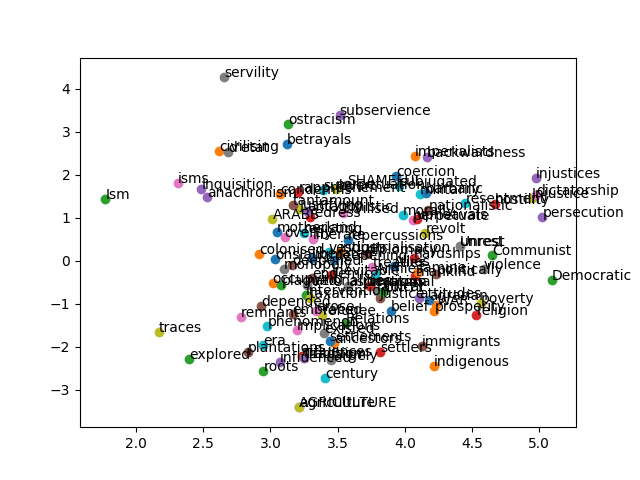

In [19]:
docNounVecs_aug_7 = [word.vector for word in aug14diff]
docNounNormVecs_aug_7 = [word.vector_norm for word in aug14diff]
docNounLabels_aug_7 = [word.text for word in aug14diff]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_aug_7)
lsaOut.shape
%matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)):
#     print(docNounLabels_fp[i], xs[i], ys[i], docNounNormVecs_fp[i])
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_aug_7[i], (xs[i], ys[i]))

<IPython.core.display.Javascript object>


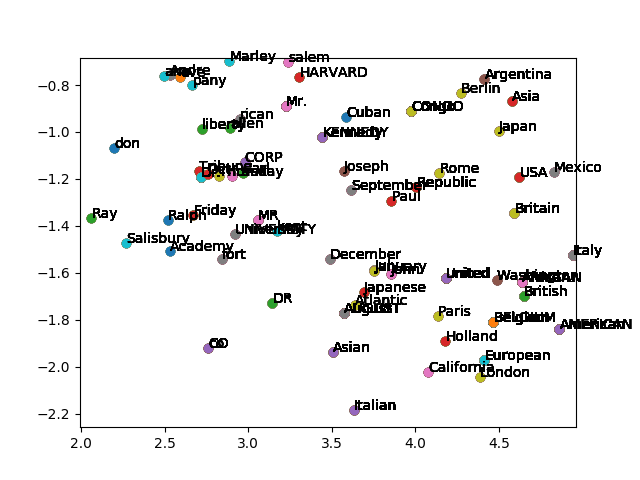

In [87]:
docNounVecs_aug_14 = [word.vector for word in wordVecs_aug_14]
docNounNormVecs_aug_14 = [word.vector_norm for word in wordVecs_aug_14]
docNounLabels_aug_14 = [word.string.strip() for word in wordVecs_aug_14]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_aug_14)
lsaOut.shape
%matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)):
#     print(docNounLabels_aug_14[i], xs[i], ys[i], docNounNormVecs_aug_14[i])
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_aug_14[i], (xs[i], ys[i]))

<IPython.core.display.Javascript object>


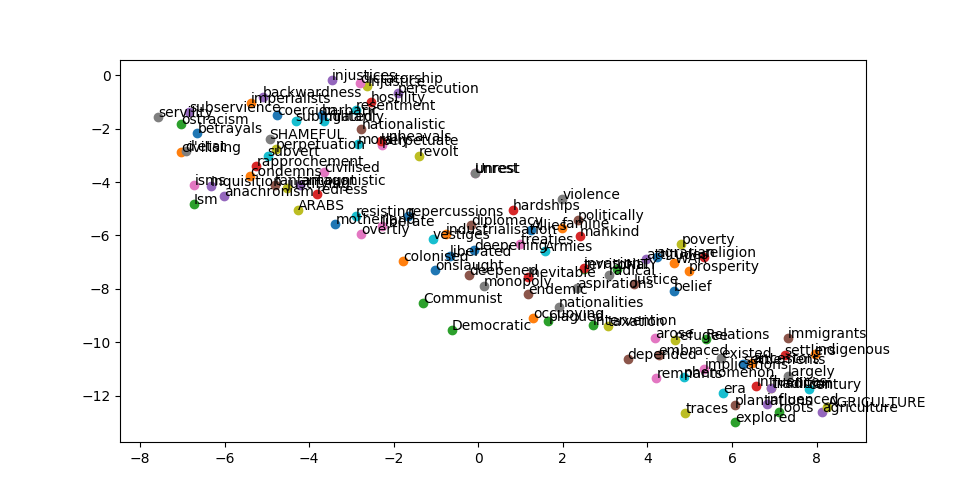

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(lsaOut)
xs, ys = X_tsne[:,0], X_tsne[:,1]
%matplotlib notebook
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_aug_7[i], (xs[i], ys[i]))